In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [24]:
df = pd. read_csv('cleaned_healthcare_dataset_stroke.csv')

In [25]:
# Fix Gender Column: Convert 0/1/2 → Male/Female/Other
gender_mapping = {0: 'Male', 1: 'Female', 2: 'Other'}
df['gender'] = df['gender'].replace(gender_mapping)


# Fill missing BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Only keep Male and Female for clean analysis (drop Other or NaN)
df = df[df['gender'].isin(['Male', 'Female'])]

# Create Age Groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Set simple modern style
sns.set_style('whitegrid')
sns.set_palette('Set2')

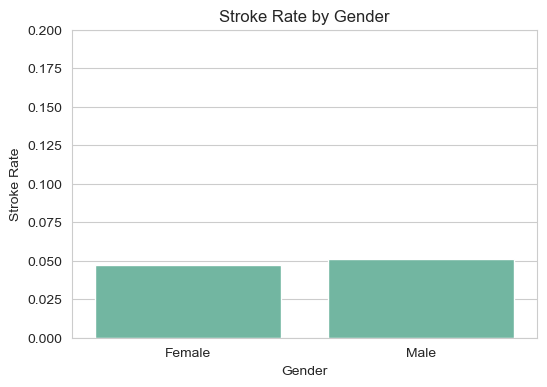

In [26]:

# ---------------------------------------
# 1. Stroke Rate by Gender
# ---------------------------------------
gender_stroke_rate = df.groupby('gender')['stroke'].mean().sort_values()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_stroke_rate.index, y=gender_stroke_rate.values)
plt.title('Stroke Rate by Gender')
plt.ylabel('Stroke Rate')
plt.xlabel('Gender')
plt.ylim(0, 0.2)
plt.show()

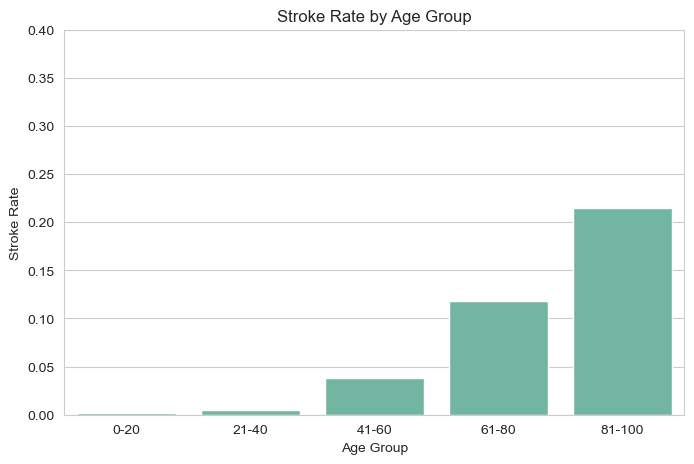

In [27]:
# ---------------------------------------
# 2. Stroke Rate by Age Group
# ---------------------------------------
agegroup_stroke_rate = df.groupby('age_group')['stroke'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=agegroup_stroke_rate.index, y=agegroup_stroke_rate.values)
plt.title('Stroke Rate by Age Group')
plt.ylabel('Stroke Rate')
plt.xlabel('Age Group')
plt.ylim(0, 0.4)
plt.show()

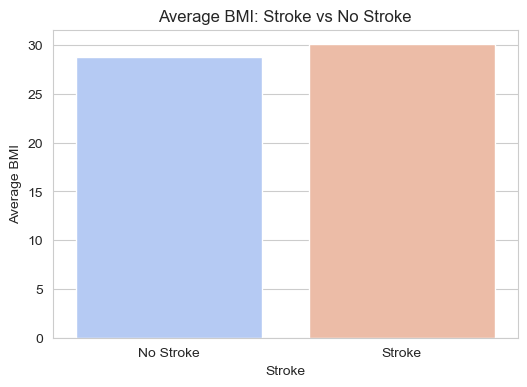

In [28]:
# ---------------------------------------
# 3. Average BMI vs Stroke
# ---------------------------------------
stroke_bmi = df.groupby('stroke')['bmi'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=stroke_bmi.index, y=stroke_bmi.values, palette='coolwarm')
plt.title('Average BMI: Stroke vs No Stroke')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel('Average BMI')
plt.xlabel('Stroke')
plt.show()

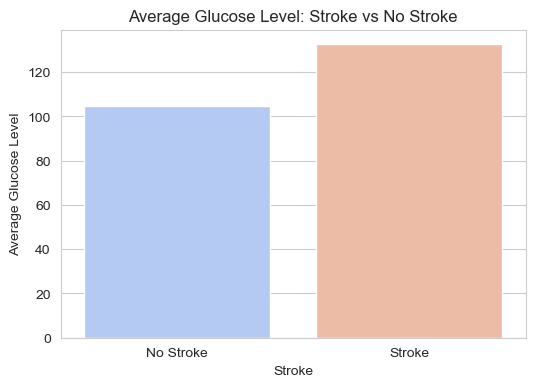

In [29]:
# ---------------------------------------
# 4. Average Glucose Level by Stroke
# ---------------------------------------
stroke_glucose = df.groupby('stroke')['avg_glucose_level'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=stroke_glucose.index, y=stroke_glucose.values, palette='coolwarm')
plt.title('Average Glucose Level: Stroke vs No Stroke')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel('Average Glucose Level')
plt.xlabel('Stroke')
plt.show()

In [30]:
# ---------------------------------------
# 5. Group Summary Table
# ---------------------------------------
group_summary = df.groupby(['gender', 'age_group']).agg({
    'stroke': ['mean', 'count'],
    'bmi': 'mean',
    'avg_glucose_level': 'mean'
}).dropna().reset_index()

# Rename columns nicely
group_summary.columns = ['Gender', 'Age Group', 'Stroke Rate', 'Count', 'Avg BMI', 'Avg Glucose']

print("\n Group Summary Table:")
print(group_summary)


 Group Summary Table:
   Gender Age Group  Stroke Rate  Count    Avg BMI  Avg Glucose
0  Female      0-20     0.004167    480  22.337292    93.696646
1  Female     21-40     0.007585    791  29.655626    94.095373
2  Female     41-60     0.034707    922  31.329284   106.033091
3  Female     61-80     0.114826    688  30.049419   119.301061
4  Female    81-100     0.194690    113  28.230973   108.881504
5    Male      0-20     0.000000    486  21.887449    95.247181
6    Male     21-40     0.000000    412  29.932282    99.868301
7    Male     41-60     0.043614    642  31.714019   108.935935
8    Male     61-80     0.123506    502  30.147610   125.360757
9    Male    81-100     0.246575     73  28.349315   142.717534


In [31]:
# ---------------------------------------
# 6. Pivot Table
# ---------------------------------------
pivot_table = pd.pivot_table(
    df,
    values='stroke',
    index='age_group',
    columns='gender',
    aggfunc='mean'
).dropna()

print("\n Stroke Rate Pivot Table (Age Group x Gender):")
print(pivot_table.round(3))



 Stroke Rate Pivot Table (Age Group x Gender):
gender     Female   Male
age_group               
0-20        0.004  0.000
21-40       0.008  0.000
41-60       0.035  0.044
61-80       0.115  0.124
81-100      0.195  0.247
